# Neural Network Introuction





In this tutorial, we will go through the basic concpet of Neural Network, see how it works, and build a simple network from strachg. Finally, we will introduce how to implemented a networks easily with the help of some poppular liabaries.

## What are Nerual Networks?

Neural networks, commonly known as Artificial Neural Networks(ANN) is a computational model that is inspired by the way biological neural networks in the human brain process information. Artificial Neural Networks have generated a lot of excitement in Machine Learning research and Data Science, thanks to many bearkthrough result in speech recognition, computer vision and text processing. But what is an ANN and how does it work? A good starting point would be examining the basic component of our brain.


##  Neurons and Perceptrons

Our brain consists of countless numbers of neurons. For each neuron, the dendrite receives electrical signals from the axons of other neurons. At the synapses between the dendrite and axons, electrical signals are modulated in various amounts. The neuron fires an output signal only when the total strength of the signals exceed a certain threshold.

The perceptron is a mathematical model of a biological neuron. Perceptrons were developed in the 1950s and 1960s by the scientist Frank Rosenblatt. While in actual neurons the dendrite receives signals, in the perceptron these electrical signals are represented as numerical values. Each value then multipies a weight, and the perceptron collects the linear combination of all input values and send it to a step fuction, just like a neuron modulates the signals. At the output end, the step function gives an output based on wether the value of linear combination is beyond certain threshold.

Below is a picture that compares a neuron and a perceptron.

<img src='./neuron.png' style='width: 70%'/>

Let's see an example to further explain how perceptron works. Suppose you are trying to make a decision on wether to go out and play tennis. You might make your decision by weighting up three input:
1. Is the weather good?
2. Do I have spare time?
3. Does any friend want to come along?

We can represent these factors by corresponding binary variables x1, x2 and x3. For instance, we'd have x1 = 1 if the weather is good, and x1 = 0 if it's bad. Similarly, x2 = 1 if we have spare time to play, x2 = 0 if not. And similarly x3 for friend.
Now let's say that for these three things, you mostly consider about weather, so you give it a weight of w1 = 10, and less care about the rest, so that their weights are less w2 = 8 and w3  = 8. The step function that you use to give the final decision may have a threshold value of 17, namely, only the linear combination of all inputs are larger than 17 will trigger  the decision of "play tennis". By varing the weights and the threshold, we can get different models of decision-making. For example, suppose we chose a lower value of the threshold, it will be easier to get the result of "going to play tennis". And if we increase the weight of x3, we consider more wehter a friend will come with you to play.
Of course, this is a over-simplification of how human brain makes decisions. But what the example illustrates is how a perceptron can weigh up different kinds of evidence in order to make decisions. And it should seem plausible that a complex network of perceptrons could make quite subtle decisions:

<img src='./network.png' style='width: 70%'/>
<font size="2"><center>Cited from Michael Nielsen</center><font>

In this network, first column of perceptrons, typically called first layer of perceptrons, makes decisions and pass them to the second layer. The second layer of perceptrons are no different than the first layer, except it uses the output from the first layer as its input. One can easily tell that the network can keep growing into a even larger scale by adding more layers and by adding more nodes in each layer. In this way, a many-layer network of perceptrons can engage in sophisticated dicesion making.

But why we what to do that? Why use the output as input and run another layer of perceptron, rather than directly make a decision based on initial input? Let's see an example that demostrate the benefit of buiding a network.

## Generating a dataset

(referenced from [here](https://github.com/dennybritz/nn-from-scratch/blob/master/nn-from-scratch.ipynb))

Let's start by generating a dataset we can play with. Fortunately, [scikit-learn](http://scikit-learn.org/) has some useful dataset generators, so we don't need to write the code ourselves. We will go with the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.

In [83]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

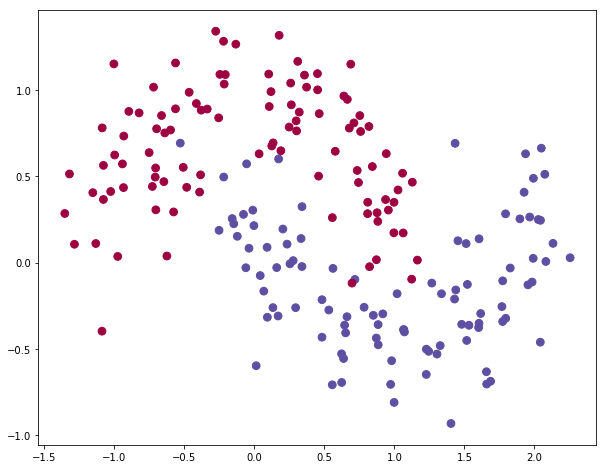

In [84]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=60, c=y, cmap=plt.cm.Spectral)

In this data set, we have a 2-dimesion input space, and a binary output y{0,1}, colored as blue and red.

Our goal is to find a model(a hyperplane, in this case, a line) that seperates these point into two classes. We can tell easily that the data is not linearly separable, meaning that we can not draw a straight line to seperate them(but we will start from there). This means that linear classifiers, such as Binary Logistic Regression, won't be able to fit the data unless we hand-engineer non-linear features, which is still challenging.

## Logistic Regression

To demonstrate the point let's train a Logistic Regression classifier. It's input will be the x- and y-values and the output the predicted class (0 or 1). To make our life easy we use the Logistic Regression class from `scikit-learn`.

In [85]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [86]:
# Helper function to plot a decision boundary. No need to understand this block of code.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5,1,'Logistic Regression')

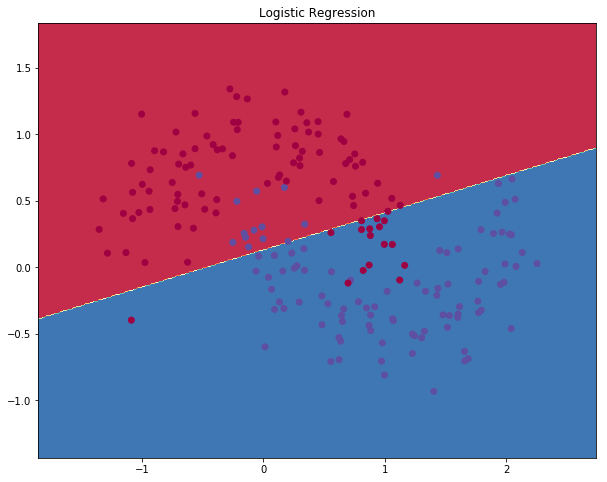

In [87]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

As we can see, the Logistic Regression did its best to seperate the data. Intuitively ,we know that the decision boundary would be an "S" shape curve. To get this curve one might need to carefully engineer the features in polynomial form.

The major advantages of Neural Networks is that you don't need to worry about feature engineering. The hidden layer (columns in the middle) will learn these features for you.

## Implementation of a NN from scratch

feed forward
backpropogation

Let's now build a simple network to solve this classification problem better. The diagram below shows the structure of our network.

<img src='./network_diagram.png' style='width: 45%'/>

In this model, we have an input dimensionality of 2 (meaning we have 2 nodes in input layer),cooresponding to our 2-dimension input x1 and x2. Similarly, we have an output dimensionality of 2 (red and blue). We also have one hidden layer which consists of 3 nodes, cooresponding to our 2 classes of output, blue and red. We now use only one hidden layer which has 3 nodes.

Wecan choose the dimensionality of the hidden layer. The more node we put into the hidden layer the more complex functions we will be able to fit. But higher dimensionality comes at a cost. First, more computation is required to make predictions and learn the network parameters. A bigger number of parameters also means we become more prone to overfitting our data.

How to choose the size of the hidden layer? While there are some general guidelines and recommendations, it always depends on your specifc problem and is more of an art than a science. We will show how this hyper-parameters affect our model.

We also need to pick an *activation function* for our hidden layer. The activation function transforms the output of the layer into a value between 0 and 1.The larger the value is, the higher probability it becomes one after mapping, in other words, it 'activate' the next node. On contrary, if the value is small, result from the activation function will extremely like to be 0, then it 'deactivate' the next node. A nonlinear activation function is what allows us to fit nonlinear hypotheses. Common chocies for activation functions are [tanh](https://reference.wolfram.com/language/ref/Tanh.html), the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function), or [ReLUs](https://en.wikipedia.org/wiki/Rectifier_(neural_networks). In this example we will use tanh. This functin is differentiable, which will become handy when we perform gradient descent later on. Below is a comparison of the three functions:



<img src='./activation_functions.png' style='width: 100%'/>

Because we want our network to output probabilities the activation function for the output layer will be the [softmax](https://en.wikipedia.org/wiki/Softmax_function), which is simply a way to convert raw scores to probabilities. If you're familiar with the logistic function you can think of softmax as its generalization to multiple classes.

## How our network makes predictions

Our network makes predictions using *forward propagation*, which is a series of matrix multiplications and the application of the activation function(s) we defined above. If $x$ is the 2-dimensional input to our network then we calculate our prediction $\hat{y}$ (also two-dimensional) as follows:

$$
\begin{aligned}
a & = xW_1 + b_1 & & \text{linear forward}\ \\
z & = \tanh(a) & &\text{activation}\ \\
b & = zW_2 + b_2 & &\text{linear forward}\ \\
\hat{y} & = \mathrm{softmax}(b) & &\text{softmax}\
\end{aligned}
$$

$a$ is the weighted sum of inputs of layer (bias included) and $z$ is the output of the first layer after applying the activation function. $W_1, b_1, W_2, b_2$ are  parameters of our network, which we need to learn from our training data. You can think of them as matrices transforming data between layers of the network. Looking at the matrix multiplications above we can figure out the dimensionality of these matrices. If we use 3 nodes for our hidden layer then $W_1 \in \mathbb{R}^{2\times3}$, $b_1 \in \mathbb{R}^{3}$, $W_2 \in \mathbb{R}^{3\times2}$, $b_2 \in \mathbb{R}^{2}$. We can see that increasing dimensionality of the hidden layer will directly increase the amount of computation needed.

## How our network learns

Our metwork needs to learn and find the best parameters for all layers ($W_1, b_1, W_2, b_2$). The goal of learning is to search for the best parameters that minimize error using our training data. Since eventually we are output probabilities of each class, it's better we use a function that evaluate error based on probaility rather than error rate. We call this function the *loss function*. And a common choice that works well with softmax output is the [cross-entropy loss](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression). If we have $N$ training examples and $C$ classes then the loss for our prediction $\hat{y}$ with respect to the true labels $y$ is given by:

$$
\begin{aligned}
L(y,\hat{y}) = - \frac{1}{N} \sum_{n \in N} \sum_{i \in C} y_{n,i} \log\hat{y}_{n,i}
\end{aligned}
$$



This function evaluates error by calculating how 'far' the prediction is away from true label. It sums over the training data and add to the loss if the prediction is incorrect. So, the further away $y$ (the correct labels) and $\hat{y}$ (our predictions) are, the greater our loss will be. 

To find the parameters that minimize this function, we can perform gradient descent since all the functions are differentiable. In this example we will use batch gradient descent, but variations such as stochastic gradient descent or mini-batch gradient descent also applies.

But wait! How are we going to apply gradient descent between each layers? Here we need to use a technic called *backpropagation*.

# Backpropagation

Similar to forward propagation but reversely, backpropagation calculate gradient respect to just the parameters from previous layer, rather than the parameters we want eventually. Then the results is stored and by applying [chain rule](https://en.wikipedia.org/wiki/Chain_rule) we can reuse these results to calculate derivatives for next layer. 

For our example, the gradients we are looking for are: $\frac{\partial{L}}{\partial{W_1}}$, $\frac{\partial{L}}{\partial{b_1}}$, $\frac{\partial{L}}{\partial{W_2}}$, $\frac{\partial{L}}{\partial{b_2}}$. The steps we need are as follows:

$$
\begin{aligned}
& g_b = \hat{y} - y & & \text{softmax backward}\ \\
& \frac{\partial{L}}{\partial{W_2}} = z^T g_b & & \text{linear backward}\ \\
& \frac{\partial{L}}{\partial{b_2}} = g_b\\
& g_a = (1 - \tanh^2z_1) \circ g_bW_2^T & & \text{tanh backward}\\\
& \frac{\partial{L}}{\partial{W_1}} = x^T g_a & & \text{linear backward}\\\
& \frac{\partial{L}}{\partial{b_1}} = g_a \\
\end{aligned}
$$

Now we have all the tools we need. We can start our implementation.

We begin by setting up the useful parameters and variables.

In [88]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

Then we need some helper functions.

In [89]:
#################
# MISCELLANEOUS TOOL
#################


def label_one_hot(y, num_labels = 2):
    """
    change binary labels into one-hot form 
    """
    y_vec = np.zeros(num_labels)
    y_vec[int(y)] = 1
    return y_vec


def error_rate(original_list, predicted_list):
    """
    Calculate the error rate
    :param original_list: original word list
    :param predicted_list: predicted word list
    :return: error rate float
    """
    return np.mean(original_list != predicted_list)

Following the steps we listed above, we can write each step as a function. This gives us more convinience in debugging, as well as easy to switch between different variations (like switch sigmoid function with tanh as activation).

In [90]:
#################
# MODULE FUNCTIONS
#################

# Forward functions
##########################
# Step 1
def linear_forward(data, weights, bias):
    """
    linear combination of first layer
    :param data: data matrix of a certain layer
    :param weights: weights W of that layer
    :param bias: bias term b of that layer
    :return: linear combination
    """
    a_vecs = data.dot(weights) + bias
    return a_vecs


# Step 2
def activation(a_vecs):
    """
    tanh activation function
    :param a_vec: vector of linear combination of previous layer
    :return: hidden layer vectors (same size as a_vecs)
    """
    z_vecs = np.tanh(a_vecs)
    return z_vecs


# Step 3
# same as step 1
# use z_vecs, 2nd layer weights and bias instead
# return b_vecs


# Step 4
def softmax(b_vecs):
    """
    find max probability label
    :param b_vec: output vector from previous layer
    :return: vector of probabilities of all labels
    """
    y_hat_vec = np.exp(b_vecs)/np.sum(np.exp(b_vecs), axis = 1, keepdims=True)
    return y_hat_vec


# Step 5
def cross_entropy(y,y_hat):
    """
    calculate cross entropy for ONE predict and true label
    :param y: true label
    :param y_hat: predictions
    :return: cross-entropy of the prediction
    """
    c_entropy = -np.dot(y,np.log(y_hat))
    return c_entropy


# Backward functions
##########################

# Step 6
def softmax_backward(y,y_hat):
    """
    gradient with respect to b (second layer output, not bias)
    """
    n = len(y)
    g_b = y_hat
    g_b[range(n), y] -= 1
    return g_b

# Step 7
def linear_backward(g_b, z):
    """
    gradient of weight and bias of previous layer
    """
    g_weights = (z.T).dot(g_b)
    g_bias = np.sum(g_b, axis = 0, keepdims = True)

    return g_weights, g_bias

# Step 8
def activation_backward(weights, g_b,z):
    """
    derivatives of the tanh function
    """
    g_a = g_b.dot(weights.T) * (1 - np.power(z, 2))
    return g_a


# Step 9
# same as step 7

We now create a class of our network

In [91]:
#################
# NEURAL NETWORK MODEL
#################

class Network():


    #################
    # INITIALIZATION
    #################


    def __init__(self, hidden_units = 3,num_features = 2, num_labels = 2):
        """
        Initialize weights
        """

        self.D = hidden_units
        self.K = num_labels
        self.M = num_features

        # Initialize with random float
        # Initialize 1st layer parameters
        self.weights_1 = np.random.randn(self.M, self.D) / np.sqrt(self.M)
        self.bias_1 = np.zeros((1, self.D))

        # Initialize 2nd layer parameters
        self.weights_2 = np.random.randn(self.D, self.K) / np.sqrt(self.D)
        self.bias_2 = np.zeros((1, self.K))

    #################
    # TRAINING
    #################

    def train(self, train_data, train_labels, num_epoch, learning_rate = 0.01, print_loss = False):
        
        
        # loop through epoches
        for epoch in range(num_epoch):

            # forward
            a = linear_forward(train_data, self.weights_1, self.bias_1)
            z = activation(a)
            b = linear_forward(z, self.weights_2, self.bias_2)
            yhat = softmax(b)


            #backward
            g_b = softmax_backward(train_labels, yhat)
            g_weights2, g_bias2 = linear_backward(g_b, z)
            g_a = activation_backward(self.weights_2, g_b, z)
            g_weights1, g_bias1 = linear_backward(g_a, train_data)
    
            # apply regularization (not on bias terms)
            g_weights2 += reg_lambda * self.weights_2
            g_weights1 += reg_lambda * self.weights_1


            #update parameters
            self.weights_1 -= learning_rate*g_weights1
            self.bias_1 -= learning_rate*g_bias1
            self.weights_2 -= learning_rate*g_weights2
            self.bias_2 -= learning_rate*g_bias2
            
            
            # print the loss.
            if print_loss and epoch % 100 == 0:
                print("Cross-entropy after iteration %i: %f" %(epoch, self.evaluate(train_data, train_labels)))




    def predict(self, new_data):
        """
        make prediction by forward propagation
        """
        # forward
        a = linear_forward(new_data, self.weights_1, self.bias_1)
        z = activation(a)
        b = linear_forward(z, self.weights_2, self.bias_2)
        yhat = softmax(b)
        
        return np.argmax(yhat, axis=1)


    def evaluate(self,data, labels):
        """
        calculate mean cross entropy for a data set
        :param data:
        :param labels:
        :return:
        """
        n = len(labels)
        sum_entropy = 0
         # forward
        a = linear_forward(data, self.weights_1, self.bias_1)
        z = activation(a)
        b = linear_forward(z, self.weights_2, self.bias_2)
        yhat = softmax(b)
        for i in range(n):
            x = data[i, :]
            y = label_one_hot(labels[i])
           
            entropy = cross_entropy(y, yhat[i])
            sum_entropy += entropy
        return sum_entropy/n

Now let's see how our network perform for the previous problem.

Cross-entropy after iteration 0: 0.466731
Cross-entropy after iteration 100: 0.314698
Cross-entropy after iteration 200: 0.297463
Cross-entropy after iteration 300: 0.170503
Cross-entropy after iteration 400: 0.082274
Cross-entropy after iteration 500: 0.071938
Cross-entropy after iteration 600: 0.069204
Cross-entropy after iteration 700: 0.067958
Cross-entropy after iteration 800: 0.067208
Cross-entropy after iteration 900: 0.066690


Text(0.5,1,'Decision Bounday for hidden layer size 3')

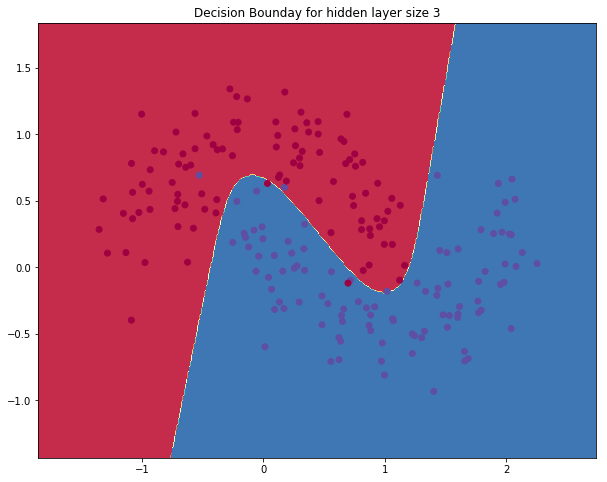

In [92]:
nn = Network(hidden_units = 3, num_features = nn_input_dim) #initialize model
nn.train(X, y, 1000, learning_rate = epsilon, print_loss = True) #train our model


plot_decision_boundary(lambda x: nn.predict(x))
plt.title("Decision Bounday for hidden layer size 3")

We can see now the model capture the characteristics of the distribution of the training data, and be able to give non-linear decision boundary. The cross-entropy decreases as the traning goes.

## Create Neural Network using Keras

[Keras](https://keras.io/) is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

To install Keras package, you need to first install TensorFlow.
[Instructions on how to install Tensorflow](https://www.tensorflow.org/install/)
[Instructions on how to install Keras](https://keras.io/#installation)

Also before running the code, make sure that tensorflow is activated. You can activate tensorflow by the following commandline: (assuming you are using Anaconda environment)

`$ conda activate tensorflow`

Now let's see how can we build the same model using Keras with just few lines of codes.

<img src='./network_diagram.png' style='width: 45%'/>

Before that, let's review the hyper-parameters that we need to build our model. Our model has input dimension of 2, 1 hidden layer, 3 nodes in the hidden layer, and 2 output classes. We use tanh as activation function between layers and softmax function for the final prediction.

Below is all the code we need to accomplish all the work we've done so far.

In [93]:
Y = []
for i in range(len(y)):
    Y.append(label_one_hot(y[i]))
Y = np.asarray(Y)

In [94]:
from keras.models import Sequential
from keras.layers import Dense

# random seed for reproducibility
np.random.seed(0)

# create model, add dense layers one by one specifying activation function
model = Sequential()
model.add(Dense(3, input_dim=2, activation='tanh')) # input layer requires input_dim param
model.add(Dense(2, activation='softmax')) 

# compile the model, SGD gradient descent (optimized)
model.compile(loss="binary_crossentropy", optimizer='sgd')

# call the function to fit to the data (training the network)
model.fit(X, Y, epochs = 10000, verbose = 0, batch_size = 10)

That's it! These 20-less lines of code does the exact same job as we did before. In fact, the actual modeling code is only 5 lines! That's why Keras is good for fast experimentation.

Let's break it down and see what happened in each line.


In line 8, we create a instance of a model, and the type of model is a sequential model. What it means is the model will be created sequencially, from left to right, layer by layer.


In line 9, we added an input layer to the model. This layer is a 'dense' layer, meaning every single node in this layer will point to every single node in the next layer. Parameter '3' indicate there are 3 node in the next layer. 'input_dim' is the input dimensionality of the model, and we only need to set this up in the input layer. 'Activation' apparently is the activation function that we choose to use in this layer.

Line 10 is not so different with line 9, except we use softmax function for our prediction.

In line 13, we compile the model, setting the loss function to cross-entropy, and optimization method as stochastic gradient descent.

In line 16, we train our model with the training data set we created.

More modeling parameters can be found [here](https://keras.io/models/model/)

Text(0.5,1,'Decision Bounday for hidden layer size 3')

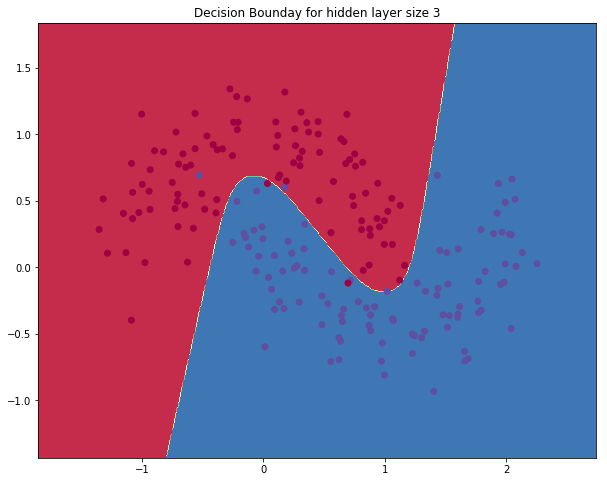

In [95]:
# plot decision boundary with the Keras model
plot_decision_boundary(lambda x: np.argmax(model.predict(x, batch_size = 10), axis = 1))
plt.title("Decision Bounday for hidden layer size 3")

# Varying the hidden layer size

In the example above we picked a hidden layer size of 3. Let's now get a sense of how varying the hidden layer size affects the result.

In [ ]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [2, 3, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = Sequential()
    model.add(Dense(nn_hdim, input_dim=2, activation='tanh')) # input layer requires input_dim param
    model.add(Dense(2, activation='softmax')) 
    model.compile(loss="binary_crossentropy", optimizer='sgd')
    model.fit(X, Y, epochs = 10000, verbose = 0, batch_size = 10)
    plot_decision_boundary(lambda x: np.argmax(model.predict(x, batch_size = 10), axis = 1))
plt.show()

As we can see, increasing the hiddenlayer dimension are prone to overfitting. The model is 'memorizing' the data rather than learning.

## Reference

1. [Keras](https://keras.io/)
2. [Introduction to Neural Networks](https://towardsdatascience.com/introduction-to-neural-networks-ead8ec1dc4dd)
3. [Create A Neural Network That Classifies Diabetes Risk In 15 Lines of Python](https://www.youtube.com/watch?v=T91fsaG2L0s)
